#                       **THE SPARKS FOUNDATION : DATA SCIENCE AND BUSINESS ANALYTICS**


#**Task-1 Prediction using Supervised ML**

#**INFORMATION**
- **AIM**- Predict the precentage of a student based on the number of study hours
- **LANGUAGE**- Python 3
- **IDE** -Google Colab
- **TYPE**- Linear Regression 
- **SUBMITTED BY**- Giridhar Benkipur

# **Importing the DatsSet**

In [ ]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#reading data from the remote link 

url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student_data = pd.read_csv(url)

print("Data imported successfully!")
student_data

Data imported successfully!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
#we can see that there are 25 rows and 2 columns in this particular data set
student_data.shape

(25, 2)

In [ ]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#we can observe that there are no null values in the data set
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## **Visulizing and Analysing the DataSet**

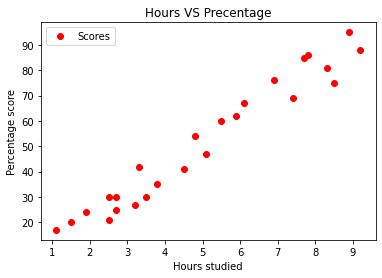

In [ ]:
#plotting the destribution of scores and number of hours studied

student_data.plot(x='Hours' , y='Scores', style='ro')
plt.title('Hours VS Precentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

In [ ]:
#From the above graph we can see that there is a positive linear relationship...if the number of hours studies is increased then the percentage score also increases .


## **Preparing the DATA**

In [ ]:
#Extracting values of "Hours Data" into Variable X and the values of "Scores Data" into variable Y.
x = student_data.iloc[:, :-1].values
y = student_data.iloc[:, 1].values

In [ ]:
#number of hours studied
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [ ]:
#scores obtained 
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [ ]:
# we split the data into train and test datasets using SK learn's built in function train_test_split()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0) 

In [ ]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [ ]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [ ]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41])

In [ ]:
y_test

array([20, 27, 69, 30, 62])

## **Design and train the ML Model**

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)
print("TRAINING COMPLETE.")

TRAINING COMPLETE.


## **Visualizing the Model**

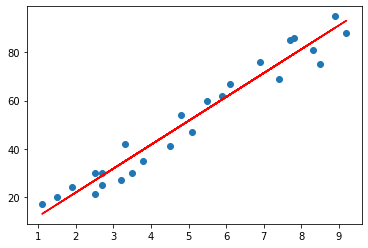

In [ ]:
# plotting the regression line
line = regressor.coef_*x+regressor.intercept_  

#plotting for the test data
plt.scatter(x, y)
plt.plot(x,line,color='red');
plt.show()

In [ ]:
print(X_test)  #Testing data in hours
y_pred = regressor.predict(X_test)   #Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
#Comparing Actual VS Predicted Data
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred })
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
#testing with a particular data of 9.25 hours/day

hours = 9.25
own_pred = regressor.predict([[hours]])
print(f"No of hours = {hours}")
print(f"Predicted score = {own_pred[0]}")

No of hours = 9.25
Predicted score = 93.69173248737539


## **Evaluating the Model**

it is important to evaluate the performance of any algorithem to compare how well different algorithems perform on a particular data set

 <b>*Mean Absolute Error*

In [ ]:
from sklearn import metrics
print('Mean Absoulte Error: ',metrics.mean_absolute_error(y_test, y_pred))

Mean Absoulte Error:  4.183859899002982


<b>*Max Error*

In [ ]:
print('Max error:',metrics.max_error(y_test,y_pred))

Max error: 6.732260779489835


<b>*Mean Squared Error*

In [ ]:
print("mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))

mean Squared Error:  21.598769307217456
